# Chapter 3: A tour of machine learning classifiers using scikit-learn
___
The second of a series of notebooks following the exercises outlined in Python Machine Learning (Second Edition), by Sebastian Raschka & Vahid Mirjalili.

## Part 1: Revisiting the perceptron with sklearn

This time we'll work with 3 different flower classes and use the built-in perceptron class of scikit learn

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris() # a dictionary-like structure
X = iris.data[:, [2, 3]] # 2D np array
y = iris.target # np array
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


*Using integer class labels is common practice and recommended due to the smaller memory footprint and reduced likelihood for technical glitches.*
<br><br>
Unlike in Ch. 2, here we will divide our data into a training set and a test set so that we can evaluate how our model performs on unseen test data. Sklearn's ```train_test_split``` method has many useful parameters: 
- **size** defines the fraction of the input data to save as test data 
- **random_state** defines the seed used for shuffling the data prior to splitting it into testing and training sets 
- **stratify** ensures that both the training and test set have the same proportions of class labels as the input data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Label counts in y: ', np.bincount(y))
print('Label counts in y_train: ', np.bincount(y_train))
print('Label counts in y_test: ', np.bincount(y_test))

Label counts in y:  [50 50 50]
Label counts in y_train:  [35 35 35]
Label counts in y_test:  [15 15 15]


Recall from last chapter that gradient descent can be optimized by **scaling the features** in the training set. Sklearn has built in functions to do this for us. The ```fit``` method of the ```StandardScaler``` class learns mean and standard deviation of the training data and then the ```transform``` method is used to standardize the training data using these scaling parameters. *Note that we should always use the same scaling parameters to scale the training and the test sets.*

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Most sklearn algorithms support multi-class classification using the **One-versus Rest (OVR)** method. So we can feed in all three classes into the sklearn perceptron.

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=100, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=100, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

Finding the right learning rate usually requires some experimentation. Too big, and we can overshoot the global cost minimum. Too small, and we will require too many steps to converge. For now we'll just start with a learning rate of 0.1 and we'll fine tune it later. Let's evaluate how our trained perceptron performs on the test set.

In [7]:
y_pred = ppn.predict(X_test_std)
n_errors = (y_test != y_pred).sum()
print('Misclassified samples: {} ({:.2f}%)'.format(
    n_errors, 100*n_errors/len(y_pred)))

Misclassified samples: 3 (6.67%)


We can evaluate the performance of our model using various metrics. *Accuracy* is the most common metric reported, and sklearn has several built-in functions to report these measures available in its **metrics** class:

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.93


Alternately, each classifier in sklearn has a **```score```** function which combines the ```predict``` and ```accuracy_score``` calls:

In [9]:
print('Accuracy: {:.2f}'.format(ppn.score(X_test_std, y_test)))

Accuracy: 0.93


Now let's visualize the decision boundaries that we learned, highlighting the data points in the test set.

In [10]:
import matplotlib.pyplot as plt
from extra import plot_decision_regions

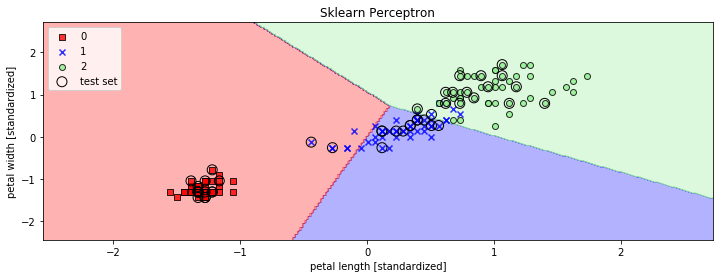

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std)) # vertical stack: rows on top of rows
y_combined = np.hstack((y_train, y_test)) # horizontal stack: columns next to columns
plt.figure(figsize=(12, 4))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.title('Sklearn Perceptron')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

As we can see from the plot above, the data were not linearly separable to begin with. Recall that the Perceptron classifier will not converge unless the classes are linearly separable, so maybe this model was not the ideal choice here.

<br>*Maybe* the data might be linearly separable if we perform PCA:

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

Accuracy: 0.89


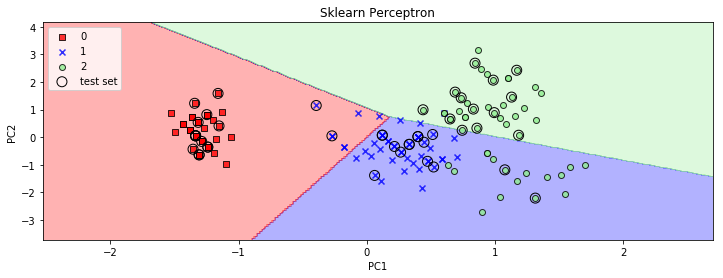

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn2 = Perceptron(n_iter=100, eta0=0.1, random_state=1)
ppn2.fit(X_train_std, y_train)

print('Accuracy: {:.2f}'.format(ppn.score(X_test_std, y_test)))

X_combined_std = np.vstack((X_train_std, X_test_std)) # vertical stack: rows on top of rows
y_combined = np.hstack((y_train, y_test)) # horizontal stack: columns next to columns
plt.figure(figsize=(12, 4))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.title('Sklearn Perceptron')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()